### Importing neccessary libraries

In [1]:
    import numpy as np 
    import pandas as pd 
    import matplotlib.pyplot as plt
    import os
    import cv2
    %matplotlib inline

In [2]:
train_path = "/content/drive/MyDrive/Train" #Save the Train folder path to a string
test_path = "/content/drive/MyDrive/Test" #Save the Test folder path to a string

In [3]:
def plot_images(img_dir):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for index_img, img_path in enumerate(img_files):
        plt.subplot(5, 5, index_img+1)
    
        img = plt.imread(img_path)
                 
        plt.imshow(img, cmap='gray') 

### Define the function plot_images:

This takes one input parameter i.e. emotion directory. It takes the first five images fron the emotion directory and plots them one by one using a subplot(matplotlib) with the help of a for loop.



In [4]:
plot_images(train_path+'/angry') #plotting first five images of angry folder

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Train/angry'

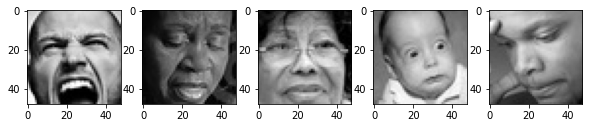

In [ ]:
plot_images(train_path+'/fear') #plotting first five images of fear folder

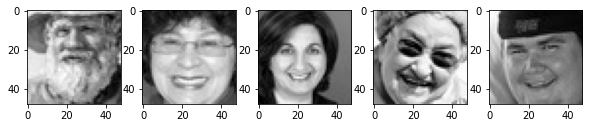

In [ ]:
plot_images(train_path+'/happy') #plotting first five images of happy folder

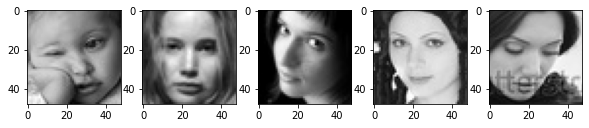

In [ ]:
plot_images(train_path+'/neutral') #plotting first five images of neutral folder

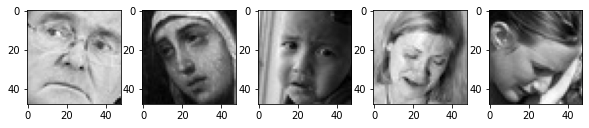

In [ ]:
plot_images(train_path+'/sad') #plotting first five images of sad folder

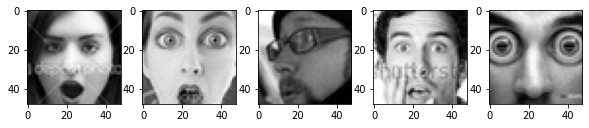

In [ ]:
plot_images(train_path+'/surprise') #plotting first five images of surprise folder

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Sorted is used to sort the files in train folder in  alphabetical order and then print the soreted list.

In [ ]:
batch_size = 64
target_size = (48,48)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

Found 28709 images belonging to 7 classes.


In [ ]:
batch_size = 64
target_size = (48,48)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

Found 7178 images belonging to 7 classes.


First we define batch_size as 64 which means that at a time 64 images will be processed by the ImageDataGenerator.

Our target size is the same as the size of our original image that is 48,48.

Train_datagen is used to specify the augmentation to be applied which is normalization is this case. Normalization simply means scaling down the pixel value between 0 and 1 by dividing the original pixel value by 255.

Flow_from_directiry takes the path to a directory & generates batches of augmented data. It should contain one subdirectory per class.

In [ ]:
from tensorflow.keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten,Conv2D,BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from tensorflow.keras.utils import plot_model

### Building and Training the CNN model

In [ ]:
model = Sequential()

#Input layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Hidden Layer 1
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Hidden Layer 2
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Hidden Layer 3
#Flattening the multidimensional output of convolutional layer and connecting the neurons using Dense Layer
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

#Output Layer
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

The neural network contains one Input layer. The input shape is (48,48,1), i.e. It takes grayscale (48,48) image as an input.

*   MaxPooling2D is used to reduce the dimensions of the image. 
*   Dropout is used to avoid overfitting.

*   Flatten is used to reduce the multidimensional data from the output of previous layers.
*   Dense layers connects all the neurons of every layer making a neural network

*   The output dense layer provides the prediction through 7 nodes

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [ ]:
emotion_model_info = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=50,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size,
    )

2022-01-15 17:30:22.414113: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-01-15 17:30:24.045502: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


448/448 [==============================] - 166s 355ms/step - loss: 1.8028 - accuracy: 0.2593 - val_loss: 1.7089 - val_accuracy: 0.3312
Epoch 2/50
448/448 [==============================] - 24s 54ms/step - loss: 1.6317 - accuracy: 0.3636 - val_loss: 1.5825 - val_accuracy: 0.4026
Epoch 3/50
448/448 [==============================] - 24s 54ms/step - loss: 1.5441 - accuracy: 0.4060 - val_loss: 1.4751 - val_accuracy: 0.4422
Epoch 4/50
448/448 [==============================] - 24s 54ms/step - loss: 1.4702 - accuracy: 0.4370 - val_loss: 1.4291 - val_accuracy: 0.4583
Epoch 5/50
448/448 [==============================] - 24s 54ms/step - loss: 1.4150 - accuracy: 0.4594 - val_loss: 1.3623 - val_accuracy: 0.4780
Epoch 6/50
448/448 [==============================] - 24s 54ms/step - loss: 1.3614 - accuracy: 0.4829 - val_loss: 1.3268 - val_accuracy: 0.4950
Epoch 7/50
448/448 [==============================] - 24s 54ms/step - loss: 1.3166 - accuracy: 0.4988 - val_loss: 1.2885 - val_accuracy: 0.5109
E

In [ ]:
model.save('Emotions.h5')

In [ ]:
import tensorflow as tf
emotions_model = tf.keras.models.load_model('Emotions.h5')

### Testing 125 images of each emotion

In [ ]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [ ]:
test_path = 'Test_img'
def make_predictions(img_dir):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs]
    pred = []
    face_region = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
    # converting to grayscale, as IT take value in opposite direction BGR, using grayscale
    # make it easy to compute as it only has one channel only.
    
    for index_img, img_path in enumerate(img_files):
        test = cv2.imread(img_path, 0)
        faces = face_region.detectMultiScale(test, scaleFactor=1.1, minNeighbors=5)
        for (x, y, w, h) in faces:
            roi_gray = test[y:y+h, x:x+w]
            cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
            #cv2.imshow('cropped', roi_gray)
            #cv2.waitKey(0)
            prediction = emotions_model.predict(cropped_img)
            max_index = int(np.argmax(prediction))
            pred.append(emotion_dict[max_index])
            print(emotion_dict[max_index])
    return pred

In [ ]:
happy = make_predictions(test_path+'/happy') #making predictions for happy test images

Happy
Happy
Happy
Happy
Fearful
Happy
Happy
Happy
Happy
Happy
Happy
Surprised
Happy
Angry
Happy
Angry
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Surprised
Happy
Happy
Neutral
Happy
Happy
Happy
Happy
Happy
Happy
Angry
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Angry
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Fearful
Fearful
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Angry
Happy
Fearful
Happy
Surprised
Fearful
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Surprised
Happy
Happy
Neutral
Happy
Happy
Happy
Angry
Fearful
Fearful
Neutral
Happy
Happy
Happy
Angry
Happy
Surprised
Happy
Happy
Happy
Happy
Surprised
Happy
Fearful
Happy
Happy
Happy
Fearful
Happy
Happy
Happy
Happy
Happy
Angry
Happy


In [ ]:
count = 0
for item in happy:
  if(item=='Happy'):
    count = count+1
print('Number of happy images correctly classified: ', count)

Number of happy images correctly classified:  104


In [ ]:
sad = make_predictions(test_path+'/sad') #making predictions for sad test images

Sad
Sad
Sad
Fearful
Fearful
Fearful
Sad
Sad
Sad
Sad
Neutral
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Fearful
Sad
Sad
Sad
Sad
Neutral
Sad
Sad
Fearful
Sad
Sad
Sad
Sad
Surprised
Sad
Fearful
Sad
Sad
Sad
Sad
Happy
Sad
Sad
Angry
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Angry
Angry
Sad
Sad
Sad
Fearful
Neutral
Sad
Sad
Neutral
Fearful
Sad
Sad
Sad
Sad
Fearful
Sad
Sad
Sad
Sad
Fearful
Sad
Sad
Sad
Sad
Sad
Surprised
Sad
Sad
Fearful
Sad
Fearful
Sad
Sad
Sad
Sad
Neutral
Sad
Sad
Sad
Sad
Angry
Sad
Fearful
Sad
Sad
Sad
Sad
Sad
Sad
Sad
Surprised
Neutral
Sad
Sad
Sad
Sad
Angry
Sad
Neutral
Fearful
Sad
Sad
Surprised
Sad
Sad
Angry
Sad
Sad


In [ ]:
count = 0
for item in sad:
  if(item=='Sad'):
    count = count+1
print('Number of sad images correctly classified: ', count)

Number of sad images correctly classified:  93


In [ ]:
fear = make_predictions(test_path+'/fear') #making predictions for fear test images

Fearful
Surprised
Sad
Surprised
Fearful
Fearful
Surprised
Fearful
Fearful
Angry
Surprised
Surprised
Neutral
Angry
Fearful
Fearful
Fearful
Fearful
Surprised
Surprised
Surprised
Surprised
Surprised
Fearful
Surprised
Fearful
Surprised
Fearful
Surprised
Surprised
Fearful
Fearful
Surprised
Fearful
Fearful
Surprised
Surprised
Surprised
Fearful
Fearful
Fearful
Surprised
Fearful
Surprised
Fearful
Angry
Surprised
Fearful
Surprised
Fearful
Angry
Fearful
Surprised
Surprised
Fearful
Fearful
Fearful
Surprised
Fearful
Fearful
Surprised
Fearful
Fearful
Fearful
Fearful
Fearful
Surprised
Sad
Fearful
Surprised
Fearful
Fearful
Surprised
Fearful
Fearful
Surprised
Fearful
Angry
Surprised
Fearful
Surprised
Surprised
Fearful
Fearful
Surprised
Surprised
Fearful
Surprised
Neutral
Surprised
Fearful
Surprised
Surprised
Fearful
Surprised
Fearful
Fearful
Surprised
Surprised
Surprised
Surprised
Neutral
Surprised
Fearful
Fearful
Surprised
Fearful
Fearful
Fearful
Surprised
Angry
Fearful
Surprised
Fearful
Surprised
Fe

In [ ]:
count = 0
for item in fear:
  if(item=='Fearful'):
    count = count+1
print('Number of fear images correctly classified: ', count)

Number of fear images correctly classified:  62


In [ ]:
surprise = make_predictions(test_path+'/surprise') #making predictions for surprise test images

Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Fearful
Fearful
Surprised
Surprised
Fearful
Surprised
Surprised
Angry
Surprised
Angry
Surprised
Surprised
Surprised
Surprised
Surprised
Fearful
Surprised
Surprised
Surprised
Surprised
Fearful
Fearful
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Fearful
Surprised
Surprised
Surprised
Surprised
Happy
Fearful
Fearful
Surprised
Happy
Surprised
Surprised
Surprised
Happy
Surprised
Angry
Happy
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Angry
Surprised
Surprised
Neutral
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Fearful
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Fearful
Surprised
Surprised
Angry
Surprised
Neutral
Surprised
Surprised
Angry
Surprised
Surprised
Surprised
Surprised
Surprised
Surprised
Fearful
Surprised
Fearful
Surprised
Surprised
Fearful
Surprised
Surprised
Surprised
Surprised
Su

In [ ]:
count = 0
for item in surprise:
  if(item=='Surprised'):
    count = count+1
print('Number of surprise images correctly classified: ', count)

Number of surprise images correctly classified:  103


In [ ]:
angry = make_predictions(test_path+'/angry') #making predictions for angry test images

Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Fearful
Neutral
Angry
Angry
Angry
Neutral
Surprised
Fearful
Sad
Surprised
Neutral
Angry
Surprised
Angry
Fearful
Angry
Angry
Neutral
Angry
Angry
Angry
Sad
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Happy
Angry
Happy
Angry
Angry
Angry
Angry
Angry
Fearful
Angry
Angry
Angry
Fearful
Angry
Angry
Happy
Angry
Fearful
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Surprised
Angry
Surprised
Angry
Angry
Fearful
Angry
Angry
Angry
Sad
Fearful
Fearful
Angry
Angry
Angry
Angry
Fearful
Happy
Angry
Angry
Angry
Angry
Angry
Angry
Fearful
Angry
Angry
Angry
Angry
Fearful
Angry
Angry
Angry
Fearful
Angry
Happy
Surprised
Angry
Angry
Surprised
Sad
Angry
Fearful
Angry
Angry
Neutral
Angry
Neutral
Angry
Angry
Fearful
Angry
Fearful
Angry
Angry
Sad
Angry
Happy
Neutral
Angry
Angry
Sad
Fearful
Sad
Angry
Angry
Happy
Angry
Angry
Angry
Angry


In [ ]:
count = 0
for item in angry:
  if(item=='Angry'):
    count = count+1
print('Number of angry images correctly classified: ', count)

Number of angry images correctly classified:  93


In [ ]:
neutral = make_predictions(test_path+'/neutral') #making predictions for neutral test images

Neutral
Neutral
Surprised
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Happy
Surprised
Neutral
Angry
Neutral
Surprised
Neutral
Happy
Neutral
Surprised
Neutral
Neutral
Surprised
Neutral
Neutral
Neutral
Angry
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Angry
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Surprised
Neutral
Neutral
Neutral
Angry
Neutral
Neutral
Neutral
Angry
Neutral
Happy
Neutral
Neutral
Neutral
Angry
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Angry
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Angry
Neutral
Neutral
Happy
Neutral
Fearful
Neutral
Sad
Fearful
Neutral
Neutral
Neutral
Fearful
Neutral
Angry
Fearful
Neutral
Neutral
Happy
Surprised
Neutral
Neutral
Fearful
Fearful
Neutral
Fearful
Neutral
Neutral
Surprised
Neutral
Surprised
Neutral
Neutral
Neutral
Neutral
Fearful
Surprised
Sad
Neutral
Neutral
Sad
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral


In [ ]:
count = 0
for item in neutral:
  if(item=='Neutral'):
    count = count+1
print('Number of neutral images correctly classified: ', count)

Number of neutral images correctly classified:  90


In [ ]:
disgust = make_predictions(test_path+'/disgust') #making predictions for disgust test images

Disgusted
Disgusted
Fearful
Angry
Disgusted
Fearful
Angry
Disgusted
Disgusted
Disgusted
Fearful
Surprised
Disgusted
Surprised
Angry
Sad
Surprised
Fearful
Angry
Disgusted
Disgusted
Disgusted
Fearful
Angry
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Angry
Fearful
Fearful
Disgusted
Disgusted
Disgusted
Angry
Disgusted
Angry
Disgusted
Disgusted
Fearful
Fearful
Angry
Disgusted
Disgusted
Angry
Neutral
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Fearful
Angry
Disgusted
Sad
Surprised
Disgusted
Disgusted
Disgusted
Disgusted
Angry
Disgusted
Disgusted
Disgusted
Surprised
Disgusted
Disgusted
Disgusted
Disgusted
Fearful
Disgusted
Disgusted
Surprised
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Sad
Surprised
Angry
Fearful
Sad
Disgusted
Disgusted
Fearful
Disgusted
Fearful
Disgusted
Happy
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Disgusted
Angry
Disg

In [ ]:
count = 0
for item in disgust:
  if(item=='Disgusted'):
    count = count+1
print('Number of disgust images correctly classified: ', count)

Number of disgust images correctly classified:  81


### Real-time Testing

In [ ]:
vid = cv2.VideoCapture(0)
while(True):

    # Capture the video frame
    # by frame
    ret, frame = vid.read()

    if not ret:
        break

    face_region = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")
    # converting to grayscale, as IT take value in opposite direction BGR, using grayscale
    # make it easy to compute as it only has one channel only.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_region.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    if faces == ():
        print("No faces found")

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        roi_gray = gray[y:y+h, x:x+w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = emotions_model.predict(cropped_img)
        prediction = prediction.reshape(-1)
        max_index = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[max_index], (x+15, y+20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_4)
        for i in range(0,7):
            prob = round(prediction[i],4)
            emot = emotion_dict[i]
            cv2.putText(frame, emot+'='+str(prob), (x+w+5, y+20+30*i), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_4)
    cv2.imshow('Prediction',frame)
    # the 'q' button is set as the quitting button
    if cv2.waitKey(32) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()